# Determining the Best Data Science Topics on Stack Exchange

#### _ The purpose of this analysis is to propose strategies to optimize viewership of Stack Exchange questions in the Data Science Topic published by an organization. A key objective is to identify the best topics for posting in order to garner higher user engagement in the Data Science topic. _

The type of questions under the Data Science site cover a broad range, like how to use python language feature to wrangle and process data, making choices involving machine learning algorithms, and other highly technical concepts.

#### Examples of topic titles include:
 - How to set the number of neurons in a neural network
 - Does gradient decent always converge to an optimum?
 - Why do convolutional neural networks work?
 
The site contains questions and answers of several types. The questions are subdivided into five categories: active, bountied, hot, (past) week, (past) month. All these categories may help differentiate topics in various ways and answer the question which are the "best". The keyword tags on questions may be useful in categorizing posts.

In a review of the Stack Exchange database, several tables stand out as most important sources of insight: posts (questions and responses), tags, votes, comments. We will focus on topic tags and how many views a given question receives.

The analysis will cover __loading and scrubbing data__, __analysis and visualization__, and __recommendations__.


## Load and scrub data

In [1]:
import pandas as pd

In [2]:
questions_2019 = pd.read_csv("2019_questions.csv")
questions_2019.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


### Hunt for problematic missing/ null values

In [4]:
nulls = questions_2019.apply(pd.isnull,axis=1)

In [5]:
nulls.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,True


In [6]:
null_id = questions_2019["Id"].isnull().sum()
null_CreationDate = questions_2019["CreationDate"].isnull().sum()
null_ViewCount = questions_2019["ViewCount"].isnull().sum()
null_Tags = questions_2019["Tags"].isnull().sum()
null_AnswerCount = questions_2019["AnswerCount"].isnull().sum()
null_FavoriteCount = questions_2019["FavoriteCount"].isnull().sum()

#### The "Favorite Count" feature is the only attribute with null values, which can just take zero.

In [7]:
print("Id ",null_id)
print("CreationDate ",null_CreationDate)
print("ViewCount ",null_ViewCount)
print("Tags ",null_Tags)
print("AnswerCount ",null_AnswerCount)
print("FavoriteCount ",null_FavoriteCount)

Id  0
CreationDate  0
ViewCount  0
Tags  0
AnswerCount  0
FavoriteCount  7432


In [8]:
# Replace NaNs with 0
questions_2019["FavoriteCount"] = questions_2019["FavoriteCount"].apply(lambda x : 0 if pd.isnull(x) else x)

In [9]:
questions_2019["FavoriteCount"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    0.0
Name: FavoriteCount, dtype: float64

### Isolate Individual Tags from "Tag" feature in Questions 
Category Tags are sandwiched by left and right brackets (\<Tag\>). So a regular expression can be used to find one or multiple tags in the Tag column.

In [10]:
from re import search
from re import findall
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print(questions_2019["Tags"][0])

<machine-learning><data-mining>


#### Add "Number of Tags" Feature to Questions Database

In [12]:
# Count the number of tags in list tags, using a regular expression
def tag_count(tags):
    return len(findall(r"[\w+-]+",tags))

In [13]:
questions_2019["Number of Tags"] = questions_2019["Tags"].apply(tag_count)

In [14]:
questions_2019[["Tags","Number of Tags"]].head(20)

,Tags,Number of Tags
0,<machine-learning><data-mining>,2
1,<machine-learning><regression><linear-regressi...,4
2,<python><time-series><forecast><forecasting>,4
3,<machine-learning><scikit-learn><pca>,3
4,<dataset><bigdata><data><speech-to-text>,4
5,<fuzzy-logic>,1
6,<time-series><anomaly-detection><online-learning>,3
7,<matrix-factorisation>,1
8,<correlation><naive-bayes-classifier>,2
9,<machine-learning><python><deep-learning><kera...,5


#### Compile Individual Tag Data
The tag dictionary TagTotals will track how many times a tag has been used in a question and viewed across all questions. 

In [15]:
def count_tag_totals(row):
    # assume dictionary TagTotals is initialized and/or used
    tags = findall(r"[\w+-]+",row["Tags"])
    views = row["ViewCount"]
    for item in tags:
        if item in TagTotals:
            counts = TagTotals[item]
            counts[0] += 1
            counts[1] += views
            counts[2] = round(counts[1]/counts[0], 2)
            TagTotals[item] = counts
        else:
            counts = [1]
            counts.append(views)
            counts.append(round(views,2))
            TagTotals[item] = counts

In [16]:
TagTotals = {}
questions_2019.apply(count_tag_totals, axis=1)
TagTotals

{'3d-object-detection': [1, 7, 7],
 '3d-reconstruction': [9, 1129, 125.44],
 'ab-test': [6, 153, 25.5],
 'accuracy': [89, 15233, 171.16],
 'activation': [1, 15, 15],
 'activation-function': [44, 13121, 298.2],
 'active-learning': [4, 155, 38.75],
 'activity-recognition': [5, 126, 25.2],
 'actor-critic': [21, 1014, 48.29],
 'adaboost': [1, 23, 23],
 'aggregation': [12, 828, 69.0],
 'ai': [25, 3432, 137.28],
 'alex-net': [5, 208, 41.6],
 'algorithms': [68, 4581, 67.37],
 'allennlp': [2, 183, 91.5],
 'amazon-ml': [1, 35, 35],
 'anaconda': [20, 10476, 523.8],
 'ann': [2, 74, 37.0],
 'annotation': [12, 1043, 86.92],
 'anomaly': [4, 352, 88.0],
 'anomaly-detection': [92, 10992, 119.48],
 'anonymization': [3, 381, 127.0],
 'anova': [2, 70, 35.0],
 'apache-hadoop': [13, 466, 35.85],
 'apache-nifi': [1, 119, 119],
 'apache-spark': [35, 4598, 131.37],
 'arima': [11, 1004, 91.27],
 'association-rules': [19, 1022, 53.79],
 'attention-mechanism': [26, 15165, 583.27],
 'auc': [3, 67, 22.33],
 'audio

### Create Top 20 List of Tags by Views

In [17]:
sort_TagTotals = sorted(TagTotals.items(), key=lambda x: x[1][1], reverse=True)

In [18]:
sort_TagTotals

[('python', [1814, 537585, 296.35]),
 ('machine-learning', [2693, 388499, 144.26]),
 ('keras', [935, 268608, 287.28]),
 ('deep-learning', [1220, 233628, 191.5]),
 ('pandas', [354, 201787, 570.02]),
 ('neural-network', [1055, 185367, 175.7]),
 ('scikit-learn', [540, 128110, 237.24]),
 ('tensorflow', [584, 121369, 207.82]),
 ('classification', [685, 104457, 152.49]),
 ('dataframe', [81, 89352, 1103.11]),
 ('lstm', [402, 74458, 185.22]),
 ('nlp', [493, 71382, 144.79]),
 ('cnn', [489, 70349, 143.86]),
 ('time-series', [466, 64134, 137.63]),
 ('numpy', [117, 49767, 425.36]),
 ('regression', [347, 49451, 142.51]),
 ('dataset', [340, 43151, 126.91]),
 ('pytorch', [175, 40240, 229.94]),
 ('csv', [27, 38654, 1431.63]),
 ('clustering', [257, 33928, 132.02]),
 ('r', [268, 33684, 125.69]),
 ('image-classification', [211, 33238, 157.53]),
 ('computer-vision', [121, 32502, 268.61]),
 ('seaborn', [38, 32244, 848.53]),
 ('xgboost', [165, 31533, 191.11]),
 ('data-mining', [217, 31056, 143.12]),
 ('feat

In [19]:
sort_TagTotals2 = []
for x,y in enumerate(sort_TagTotals):
    row = []
    row.append(y[0])
    row.append(y[1][0])
    row.append(y[1][1])
    row.append(y[1][2])
    sort_TagTotals2.append(tuple(row))
sort_TagTotals2  

[('python', 1814, 537585, 296.35),
 ('machine-learning', 2693, 388499, 144.26),
 ('keras', 935, 268608, 287.28),
 ('deep-learning', 1220, 233628, 191.5),
 ('pandas', 354, 201787, 570.02),
 ('neural-network', 1055, 185367, 175.7),
 ('scikit-learn', 540, 128110, 237.24),
 ('tensorflow', 584, 121369, 207.82),
 ('classification', 685, 104457, 152.49),
 ('dataframe', 81, 89352, 1103.11),
 ('lstm', 402, 74458, 185.22),
 ('nlp', 493, 71382, 144.79),
 ('cnn', 489, 70349, 143.86),
 ('time-series', 466, 64134, 137.63),
 ('numpy', 117, 49767, 425.36),
 ('regression', 347, 49451, 142.51),
 ('dataset', 340, 43151, 126.91),
 ('pytorch', 175, 40240, 229.94),
 ('csv', 27, 38654, 1431.63),
 ('clustering', 257, 33928, 132.02),
 ('r', 268, 33684, 125.69),
 ('image-classification', 211, 33238, 157.53),
 ('computer-vision', 121, 32502, 268.61),
 ('seaborn', 38, 32244, 848.53),
 ('xgboost', 165, 31533, 191.11),
 ('data-mining', 217, 31056, 143.12),
 ('feature-selection', 209, 29128, 139.37),
 ('bert', 64, 2

In [20]:
sort_tagtotals_df = pd.DataFrame(sort_TagTotals2,columns=["Tags","Used","Views","VPU"],copy=True)
# sort_top20_tagtotals = pd.DataFrame(columns=["Tags","Views"])
# sort_TagTotals_df = pd.DataFrame(columns=["Tags","Used","Views"])
# sort_tagtotals_df.shape
sort_tagtotals_df

,Tags,Used,Views,VPU
0,python,1814,537585,296.35
1,machine-learning,2693,388499,144.26
2,keras,935,268608,287.28
3,deep-learning,1220,233628,191.50
4,pandas,354,201787,570.02
5,neural-network,1055,185367,175.70
6,scikit-learn,540,128110,237.24
7,tensorflow,584,121369,207.82
8,classification,685,104457,152.49
9,dataframe,81,89352,1103.11


In [21]:
sort_tagtotals_df.head(21)

,Tags,Used,Views,VPU
0,python,1814,537585,296.35
1,machine-learning,2693,388499,144.26
2,keras,935,268608,287.28
3,deep-learning,1220,233628,191.50
4,pandas,354,201787,570.02
5,neural-network,1055,185367,175.70
6,scikit-learn,540,128110,237.24
7,tensorflow,584,121369,207.82
8,classification,685,104457,152.49
9,dataframe,81,89352,1103.11


In [22]:
# sort_top20_tagtotals = sort_tagtotals_df.head(21)
sort_top20_tagtotals = pd.DataFrame(sort_tagtotals_df.head(21), 
                                    columns=["Tags","Used","Views","VPU"],copy=True)
sort_top20_tagtotals.loc[20,"Tags"] = 'Remaining {0} items'.format(len(sort_tagtotals_df) - 20) 
sort_top20_tagtotals.loc[20,"Used"] = sort_tagtotals_df.loc[20:,"Used"].sum()
sort_top20_tagtotals.loc[20,"Views"] = sort_tagtotals_df.loc[20:,"Views"].sum()
sort_top20_tagtotals.loc[20,"VPU"] = round(sort_top20_tagtotals.loc[20,"Views"]
                                           /sort_top20_tagtotals.loc[20,"Used"], 2)

In [23]:
sort_top20_tagtotals

,Tags,Used,Views,VPU
0,python,1814,537585,296.35
1,machine-learning,2693,388499,144.26
2,keras,935,268608,287.28
3,deep-learning,1220,233628,191.50
4,pandas,354,201787,570.02
5,neural-network,1055,185367,175.70
6,scikit-learn,540,128110,237.24
7,tensorflow,584,121369,207.82
8,classification,685,104457,152.49
9,dataframe,81,89352,1103.11


In [24]:
print(sort_tagtotals_df.loc[20,"Tags"],": ",sort_tagtotals_df.loc[20,"Views"])

r :  33684


In [25]:
# sums of top20 and all views
top20_sum = sort_tagtotals_df.loc[0:19,"Views"].sum()
total_sum = sort_top20_tagtotals.loc[20,"Views"] + top20_sum
print("Top 20 sum: ",top20_sum," Total sum: ", total_sum)

Top 20 sum:  2794276  Total sum:  4735362


#### Fraction of Top 20 Views vs. All Views = 0.59

In [26]:
top20_fraction = round(top20_sum/total_sum,2)
print(top20_fraction)

0.59


### Create Top 20 List of Tags Used in Questions

In [27]:
sort_TagTotUsed = sorted(TagTotals.items(), key=lambda x: x[1][0], reverse=True)

In [28]:
sort_TagTotUsed

[('machine-learning', [2693, 388499, 144.26]),
 ('python', [1814, 537585, 296.35]),
 ('deep-learning', [1220, 233628, 191.5]),
 ('neural-network', [1055, 185367, 175.7]),
 ('keras', [935, 268608, 287.28]),
 ('classification', [685, 104457, 152.49]),
 ('tensorflow', [584, 121369, 207.82]),
 ('scikit-learn', [540, 128110, 237.24]),
 ('nlp', [493, 71382, 144.79]),
 ('cnn', [489, 70349, 143.86]),
 ('time-series', [466, 64134, 137.63]),
 ('lstm', [402, 74458, 185.22]),
 ('pandas', [354, 201787, 570.02]),
 ('regression', [347, 49451, 142.51]),
 ('dataset', [340, 43151, 126.91]),
 ('r', [268, 33684, 125.69]),
 ('predictive-modeling', [265, 16949, 63.96]),
 ('clustering', [257, 33928, 132.02]),
 ('statistics', [234, 19289, 82.43]),
 ('machine-learning-model', [224, 22753, 101.58]),
 ('data', [217, 28642, 131.99]),
 ('data-mining', [217, 31056, 143.12]),
 ('image-classification', [211, 33238, 157.53]),
 ('feature-selection', [209, 29128, 139.37]),
 ('reinforcement-learning', [203, 20101, 99.02]

In [29]:
sort_TagTotUsed2 = []
for x,y in enumerate(sort_TagTotUsed):
    row = []
    row.append(y[0])
    row.append(y[1][0])
    row.append(y[1][1])
    row.append(y[1][2])
    sort_TagTotUsed2.append(tuple(row))
sort_TagTotUsed2 

[('machine-learning', 2693, 388499, 144.26),
 ('python', 1814, 537585, 296.35),
 ('deep-learning', 1220, 233628, 191.5),
 ('neural-network', 1055, 185367, 175.7),
 ('keras', 935, 268608, 287.28),
 ('classification', 685, 104457, 152.49),
 ('tensorflow', 584, 121369, 207.82),
 ('scikit-learn', 540, 128110, 237.24),
 ('nlp', 493, 71382, 144.79),
 ('cnn', 489, 70349, 143.86),
 ('time-series', 466, 64134, 137.63),
 ('lstm', 402, 74458, 185.22),
 ('pandas', 354, 201787, 570.02),
 ('regression', 347, 49451, 142.51),
 ('dataset', 340, 43151, 126.91),
 ('r', 268, 33684, 125.69),
 ('predictive-modeling', 265, 16949, 63.96),
 ('clustering', 257, 33928, 132.02),
 ('statistics', 234, 19289, 82.43),
 ('machine-learning-model', 224, 22753, 101.58),
 ('data', 217, 28642, 131.99),
 ('data-mining', 217, 31056, 143.12),
 ('image-classification', 211, 33238, 157.53),
 ('feature-selection', 209, 29128, 139.37),
 ('reinforcement-learning', 203, 20101, 99.02),
 ('data-science-model', 186, 23209, 124.78),
 (

In [30]:
sort_tagtotused_df = pd.DataFrame(sort_TagTotUsed2,columns=["Tags","Used","Views","VPU"],copy=True)
sort_tagtotused_df.head(10)

,Tags,Used,Views,VPU
0,machine-learning,2693,388499,144.26
1,python,1814,537585,296.35
2,deep-learning,1220,233628,191.50
3,neural-network,1055,185367,175.70
4,keras,935,268608,287.28
5,classification,685,104457,152.49
6,tensorflow,584,121369,207.82
7,scikit-learn,540,128110,237.24
8,nlp,493,71382,144.79
9,cnn,489,70349,143.86


In [31]:
# sort_top20_tagtotused = sort_tagtotused_df.head(21)
sort_top20_tagtotused = pd.DataFrame(sort_tagtotused_df.head(21), 
                                    columns=["Tags","Used","Views","VPU"],copy=True)
sort_top20_tagtotused.loc[20,"Tags"] = 'Remaining {0} items'.format(len(sort_tagtotused_df) - 20) 
sort_top20_tagtotused.loc[20,"Used"] = sort_tagtotused_df.loc[20:,"Used"].sum()
sort_top20_tagtotused.loc[20,"Views"] = sort_tagtotused_df.loc[20:,"Views"].sum()
sort_top20_tagtotused.loc[20,"VPU"] = round(sort_top20_tagtotused.loc[20,"Views"]
                                           /sort_top20_tagtotused.loc[20,"Used"], 2)


In [32]:
sort_tagtotused_df.head(21)

,Tags,Used,Views,VPU
0,machine-learning,2693,388499,144.26
1,python,1814,537585,296.35
2,deep-learning,1220,233628,191.50
3,neural-network,1055,185367,175.70
4,keras,935,268608,287.28
5,classification,685,104457,152.49
6,tensorflow,584,121369,207.82
7,scikit-learn,540,128110,237.24
8,nlp,493,71382,144.79
9,cnn,489,70349,143.86


In [33]:
sort_top20_tagtotused

,Tags,Used,Views,VPU
0,machine-learning,2693,388499,144.26
1,python,1814,537585,296.35
2,deep-learning,1220,233628,191.50
3,neural-network,1055,185367,175.70
4,keras,935,268608,287.28
5,classification,685,104457,152.49
6,tensorflow,584,121369,207.82
7,scikit-learn,540,128110,237.24
8,nlp,493,71382,144.79
9,cnn,489,70349,143.86


### Create Top 20 List of Tag Views Per Use Ratio (VPU)

In [34]:
sort_TagTotVPU = sorted(TagTotals.items(), key=lambda x: x[1][2], reverse=True)

In [35]:
sort_TagTotVPU

[('data-formats', [9, 28644, 3182.67]),
 ('table', [4, 10754, 2688.5]),
 ('difference', [5, 8033, 1606.6]),
 ('csv', [27, 38654, 1431.63]),
 ('dataframe', [81, 89352, 1103.11]),
 ('methods', [4, 3790, 947.5]),
 ('seaborn', [38, 32244, 848.53]),
 ('epochs', [11, 8115, 737.73]),
 ('excel', [24, 16920, 705.0]),
 ('historgram', [7, 4837, 691.0]),
 ('data-wrangling', [15, 9282, 618.8]),
 ('indexing', [6, 3590, 598.33]),
 ('attention-mechanism', [26, 15165, 583.27]),
 ('pandas', [354, 201787, 570.02]),
 ('serialisation', [3, 1700, 566.67]),
 ('gpu', [42, 22900, 545.24]),
 ('opencv', [39, 20927, 536.59]),
 ('anaconda', [20, 10476, 523.8]),
 ('aws-lambda', [2, 992, 496.0]),
 ('label-smoothing', [1, 480, 480]),
 ('label-flipping', [1, 480, 480]),
 ('kendalls-tau-coefficient', [1, 474, 474]),
 ('spearmans-rank-correlation', [1, 474, 474]),
 ('linux', [5, 2309, 461.8]),
 ('bert', [64, 28874, 451.16]),
 ('dropout', [15, 6703, 446.87]),
 ('net', [1, 438, 438]),
 ('mathematics', [17, 7243, 426.06]),

In [36]:
sort_TagTotVPU2 = []
for x,y in enumerate(sort_TagTotVPU):
    row = []
    row.append(y[0])
    row.append(y[1][0])
    row.append(y[1][1])
    row.append(y[1][2])
    sort_TagTotVPU2.append(tuple(row))
sort_TagTotVPU2  

[('data-formats', 9, 28644, 3182.67),
 ('table', 4, 10754, 2688.5),
 ('difference', 5, 8033, 1606.6),
 ('csv', 27, 38654, 1431.63),
 ('dataframe', 81, 89352, 1103.11),
 ('methods', 4, 3790, 947.5),
 ('seaborn', 38, 32244, 848.53),
 ('epochs', 11, 8115, 737.73),
 ('excel', 24, 16920, 705.0),
 ('historgram', 7, 4837, 691.0),
 ('data-wrangling', 15, 9282, 618.8),
 ('indexing', 6, 3590, 598.33),
 ('attention-mechanism', 26, 15165, 583.27),
 ('pandas', 354, 201787, 570.02),
 ('serialisation', 3, 1700, 566.67),
 ('gpu', 42, 22900, 545.24),
 ('opencv', 39, 20927, 536.59),
 ('anaconda', 20, 10476, 523.8),
 ('aws-lambda', 2, 992, 496.0),
 ('label-smoothing', 1, 480, 480),
 ('label-flipping', 1, 480, 480),
 ('kendalls-tau-coefficient', 1, 474, 474),
 ('spearmans-rank-correlation', 1, 474, 474),
 ('linux', 5, 2309, 461.8),
 ('bert', 64, 28874, 451.16),
 ('dropout', 15, 6703, 446.87),
 ('net', 1, 438, 438),
 ('mathematics', 17, 7243, 426.06),
 ('numpy', 117, 49767, 425.36),
 ('dplyr', 6, 2485, 414

In [37]:
sort_tagtotVPU_df = pd.DataFrame(sort_TagTotVPU2,columns=["Tags","Used","Views","VPU"],copy=True)
sort_tagtotVPU_df

,Tags,Used,Views,VPU
0,data-formats,9,28644,3182.67
1,table,4,10754,2688.50
2,difference,5,8033,1606.60
3,csv,27,38654,1431.63
4,dataframe,81,89352,1103.11
5,methods,4,3790,947.50
6,seaborn,38,32244,848.53
7,epochs,11,8115,737.73
8,excel,24,16920,705.00
9,historgram,7,4837,691.00


In [38]:
sort_tagtotVPU_df.head(21)

,Tags,Used,Views,VPU
0,data-formats,9,28644,3182.67
1,table,4,10754,2688.50
2,difference,5,8033,1606.60
3,csv,27,38654,1431.63
4,dataframe,81,89352,1103.11
5,methods,4,3790,947.50
6,seaborn,38,32244,848.53
7,epochs,11,8115,737.73
8,excel,24,16920,705.00
9,historgram,7,4837,691.00


In [39]:
sort_top20_tagtotVPU = pd.DataFrame(sort_tagtotVPU_df.head(21), 
                                    columns=["Tags","Used","Views","VPU"],copy=True)
sort_top20_tagtotVPU.loc[20,"Tags"] = 'Remaining {0} items'.format(len(sort_tagtotVPU_df) - 20) 
sort_top20_tagtotVPU.loc[20,"Used"] = sort_tagtotVPU_df.loc[20:,"Used"].sum()
sort_top20_tagtotVPU.loc[20,"Views"] = sort_tagtotVPU_df.loc[20:,"Views"].sum()
sort_top20_tagtotVPU.loc[20,"VPU"] = round(sort_top20_tagtotVPU.loc[20,"Views"]
                                           /sort_top20_tagtotVPU.loc[20,"Used"], 2)

In [40]:
sort_top20_tagtotVPU

,Tags,Used,Views,VPU
0,data-formats,9,28644,3182.67
1,table,4,10754,2688.50
2,difference,5,8033,1606.60
3,csv,27,38654,1431.63
4,dataframe,81,89352,1103.11
5,methods,4,3790,947.50
6,seaborn,38,32244,848.53
7,epochs,11,8115,737.73
8,excel,24,16920,705.00
9,historgram,7,4837,691.00


### Find Common Tag Groupings in Top 20 Lists
####  Which Top 20 Used Tags Are Included Top 20 Viewed?
The tags that are used most in questions overlap significantly with the tags that are viewed most. The Top 9 most viewed are also in the top 20 most used in questions. Only four tags from the top 20 most used (dataframe, numpy, pytorch, csv) are not included in the top 20 most used.

In [41]:
in_views = pd.merge(sort_top20_tagtotals,sort_top20_tagtotused, 
                   how="left", on="Tags")
in_views

,Tags,Used_x,Views_x,VPU_x,Used_y,Views_y,VPU_y
0,python,1814,537585,296.35,1814.0,537585.0,296.35
1,machine-learning,2693,388499,144.26,2693.0,388499.0,144.26
2,keras,935,268608,287.28,935.0,268608.0,287.28
3,deep-learning,1220,233628,191.50,1220.0,233628.0,191.50
4,pandas,354,201787,570.02,354.0,201787.0,570.02
5,neural-network,1055,185367,175.70,1055.0,185367.0,175.70
6,scikit-learn,540,128110,237.24,540.0,128110.0,237.24
7,tensorflow,584,121369,207.82,584.0,121369.0,207.82
8,classification,685,104457,152.49,685.0,104457.0,152.49
9,dataframe,81,89352,1103.11,NaN,NaN,NaN


####  Which Top 20 Viewed Tags Are Included Top 20 Used?
All of the top 10 most viewed were in the top 20 most used in questions. Four of top 20 most used are not in the top 20 most viewed (r, predictive-modeling, statistics, machine-learning model).

In [42]:
in_used = pd.merge(sort_top20_tagtotals,sort_top20_tagtotused, 
                   how="right", on="Tags")
in_used

,Tags,Used_x,Views_x,VPU_x,Used_y,Views_y,VPU_y
0,python,1814.0,537585.0,296.35,1814,537585,296.35
1,machine-learning,2693.0,388499.0,144.26,2693,388499,144.26
2,keras,935.0,268608.0,287.28,935,268608,287.28
3,deep-learning,1220.0,233628.0,191.50,1220,233628,191.50
4,pandas,354.0,201787.0,570.02,354,201787,570.02
5,neural-network,1055.0,185367.0,175.70,1055,185367,175.70
6,scikit-learn,540.0,128110.0,237.24,540,128110,237.24
7,tensorflow,584.0,121369.0,207.82,584,121369,207.82
8,classification,685.0,104457.0,152.49,685,104457,152.49
9,lstm,402.0,74458.0,185.22,402,74458,185.22


####  Which Top 20 VPU Tags Are Included Top 20 Viewed?
Only three tags in the top 20 most viewed occurs in the top 20 in Views Per Use (VPU) (pandas,dataframe,csv).


In [43]:
in_VPU = pd.merge(sort_top20_tagtotals,sort_top20_tagtotVPU, 
                   how="left", on="Tags")
in_VPU

,Tags,Used_x,Views_x,VPU_x,Used_y,Views_y,VPU_y
0,python,1814,537585,296.35,NaN,NaN,NaN
1,machine-learning,2693,388499,144.26,NaN,NaN,NaN
2,keras,935,268608,287.28,NaN,NaN,NaN
3,deep-learning,1220,233628,191.50,NaN,NaN,NaN
4,pandas,354,201787,570.02,354.0,201787.0,570.02
5,neural-network,1055,185367,175.70,NaN,NaN,NaN
6,scikit-learn,540,128110,237.24,NaN,NaN,NaN
7,tensorflow,584,121369,207.82,NaN,NaN,NaN
8,classification,685,104457,152.49,NaN,NaN,NaN
9,dataframe,81,89352,1103.11,81.0,89352.0,1103.11


## Visualization and Analysis

### Top 20 Tags by Views
The 20 best tags in gathering views make up 59% of all views from 507 other items. The top 5 tags contribute disproportionly even amongst the top 20.

The top 8 tags by views - _python, machine learning, keras, deep-learning, pandas, neural-network, scikit-learn, tensorflow_ - center on the overarching topic of __deep learning__.

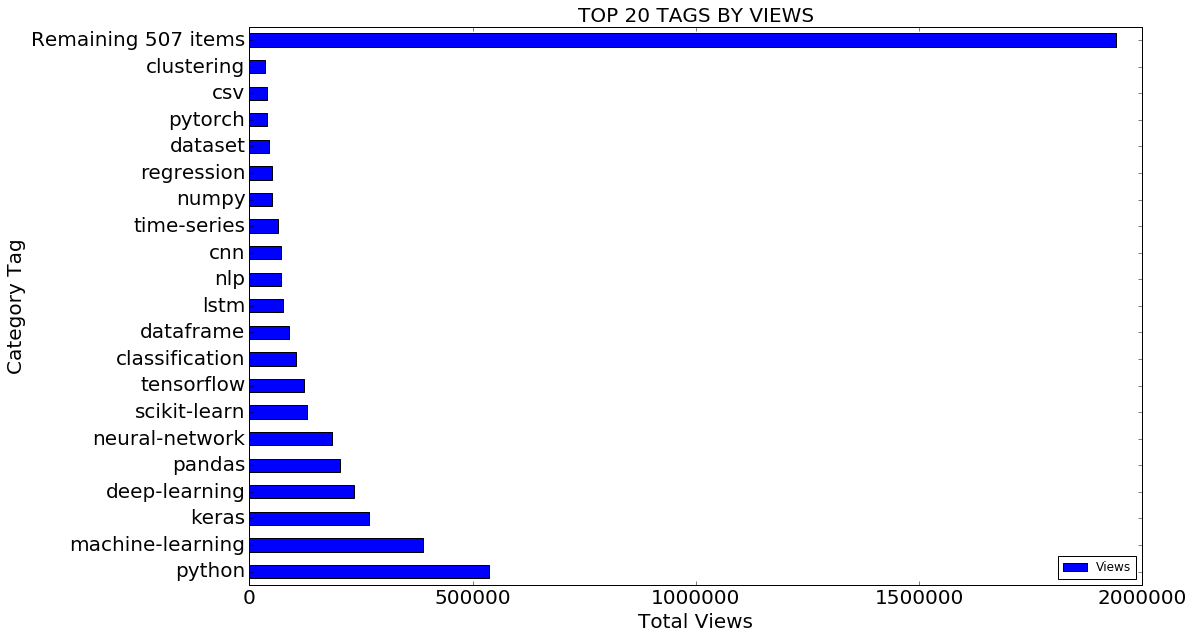

In [44]:
# Bar Charts
ax = sort_top20_tagtotals.plot(x="Tags",y="Views",kind="barh",figsize=(16,10),
                               title="TOP 20 TAGS BY VIEWS",color = "b")
# ax.set_xlabel("Category Tag")
# ax.set_ylabel("Views")
# start, end = ax.get_xlim()
# ax.get_xticks()
# ax.set_xticks()
# ax.set_xticklabels("automatic",weight="bold")
# plt.show()
plt.title("TOP 20 TAGS BY VIEWS", fontsize=20)
plt.tick_params(labelsize = 20)
plt.xlabel("Total Views",fontsize=20)
plt.ylabel("Category Tag",fontsize=20)

### Top 20 Tags by Views, Use View
The number of uses of a tag generally related to how many total views they gather, but the correlation is not 100%. Broad topics like _csv_, _numpy_, _dataframe_, and _pandas_ gather a greater number of views on fewer uses in questions.  A possible explanation is that these are broad fundamental topics with a greater appeal to novice participants, who need more basic help in these areas.


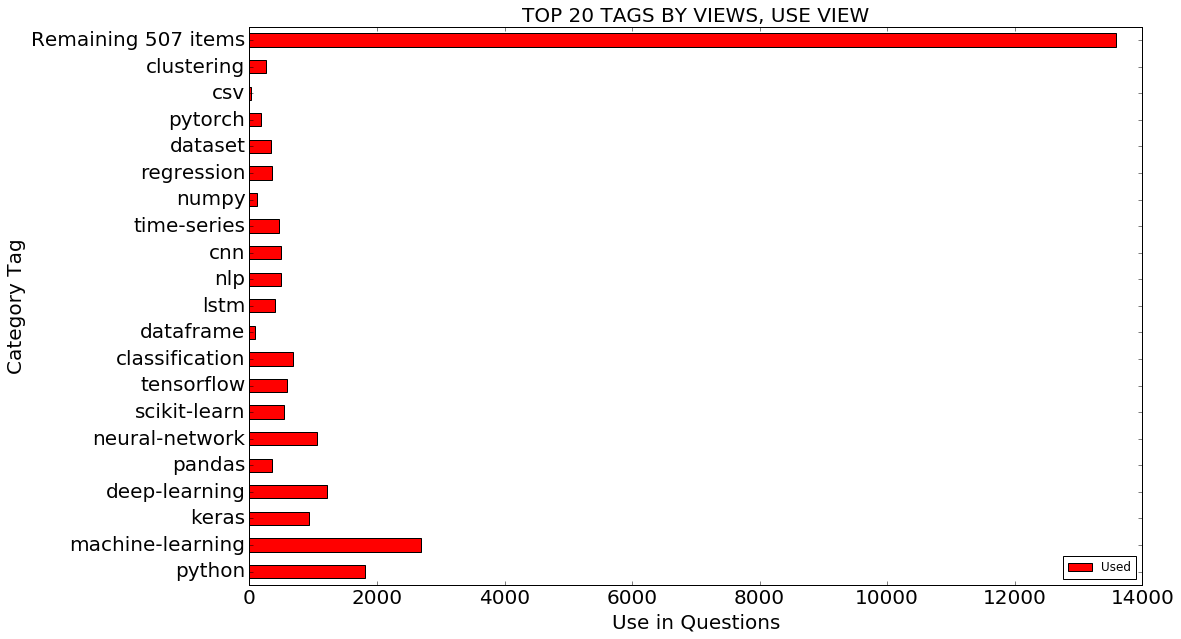

In [45]:
ax = sort_top20_tagtotals.plot(x="Tags",y="Used",kind="barh",figsize=(16,10),
                               title="TOP 20 TAGS BY VIEWS, USE VIEW",color = "r")
ax.set_xlabel("Category Tag")
ax.set_ylabel("Use in Questions")
# ax.set_xticklabels("automatic",weight="bold")
plt.title("TOP 20 TAGS BY VIEWS, USE VIEW", fontsize=20)
plt.tick_params(labelsize = 20)
plt.xlabel("Use in Questions",fontsize=20)
plt.ylabel("Category Tag",fontsize=20)

### Top 20 Tags by Uses
A majority of the top tags by uses are shared in the top tags by views. The top tags by uses are similarly top heavy. Notably, as with the top 8 tags by views, the top 10 by uses have a strong relationship to __ deep learning__.

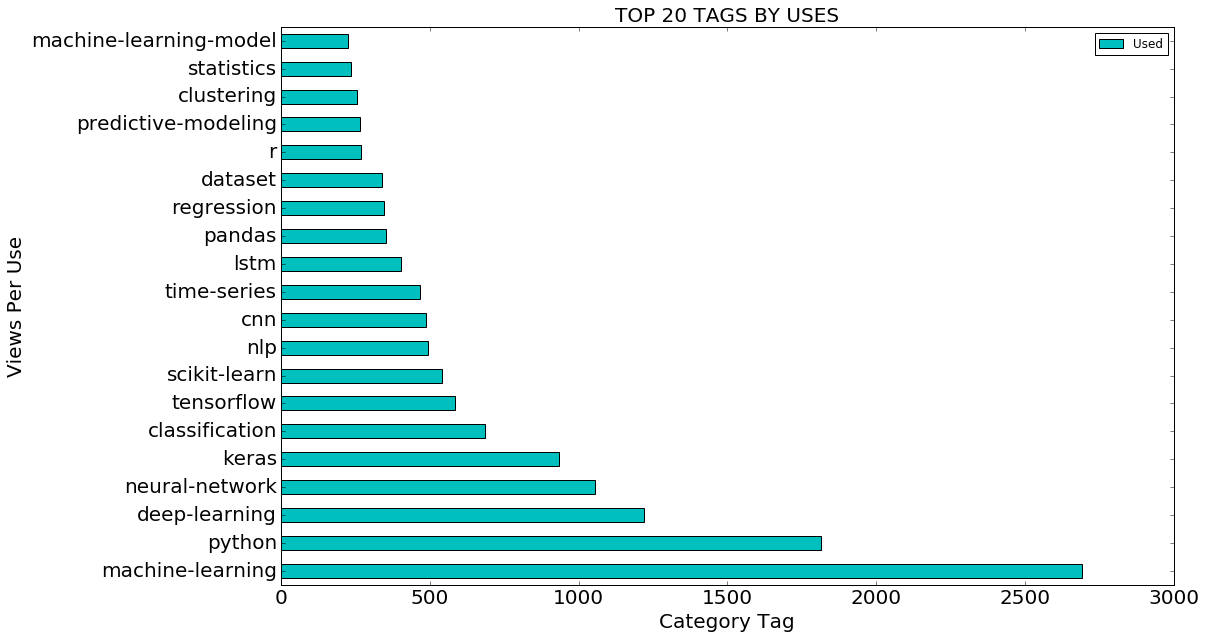

In [46]:
ax = sort_top20_tagtotused.loc[:19,:].plot(x="Tags",y="Used",kind="barh",figsize=(16,10),
                               title="TOP 20 TAGS BY USES",color = "c")
ax.set_xlabel("Category Tag")
ax.set_ylabel("Used in Questions")
plt.title("TOP 20 TAGS BY USES", fontsize=20)
plt.tick_params(labelsize = 20)
plt.xlabel("Category Tag",fontsize=20)
plt.ylabel("Views Per Use",fontsize=20)

### Top 20 Tags by VPU
The Views Per Use investigated the power of individual tags in drawing views. This metric did not closely track the top views or uses. Rather, the VPUs seemed to be related to how broad and fundamental the tag is, a point made ealier for the use view graph. Since these topics are fundamental, they may be of more interest to users at an entry-level.

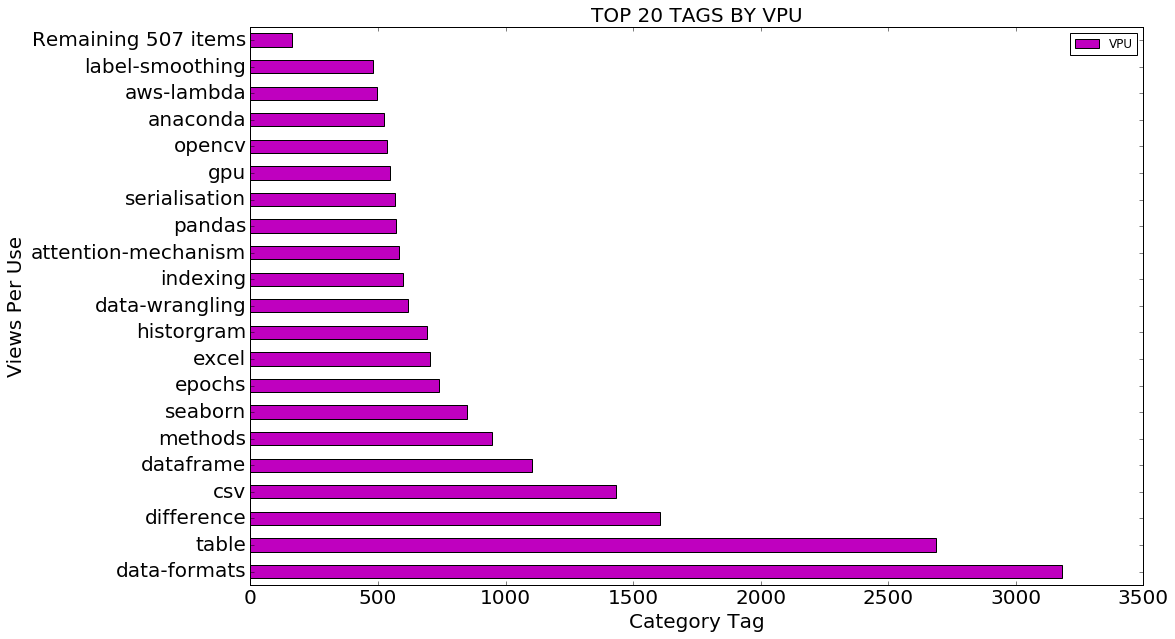

In [47]:
ax = sort_top20_tagtotVPU.plot(x="Tags",y="VPU",kind="barh",figsize=(16,10),
                               title="TOP 20 TAGS BY VPU",color = "m")
ax.set_xlabel("Category Tag")
ax.set_ylabel("Views Per Use")
# ax.set_xticklabels("automatic",weight="bold")
plt.title("TOP 20 TAGS BY VPU", fontsize=20)
plt.tick_params(labelsize = 20)
plt.xlabel("Category Tag",fontsize=20)
plt.ylabel("Views Per Use",fontsize=20)

### The Effect of Adding Tags
Another factor that was investigated is the effect of adding a certain number of tags. _Questions with more than one tag tended to outperform questions with one tag only_. The mean for a one-tag question was 112 views. That mean increased to 196 views for two tags, 155 for three tags, and about 190 for numbers above three.

In [48]:
questions_2019[questions_2019["Number of Tags"]==1]["ViewCount"].describe()


count    1126.000000
mean      112.224689
std       434.606147
min         4.000000
25%        18.000000
50%        32.000000
75%        64.000000
max      7523.000000
Name: ViewCount, dtype: float64

In [49]:
questions_2019[questions_2019["Number of Tags"]==2]["ViewCount"].describe()

count     2111.000000
mean       195.585031
std        976.016321
min          3.000000
25%         20.000000
50%         37.000000
75%         94.000000
max      33203.000000
Name: ViewCount, dtype: float64

In [50]:
questions_2019[questions_2019["Number of Tags"]==3]["ViewCount"].describe()

count     2468.000000
mean       155.149514
std        543.790247
min          2.000000
25%         22.000000
50%         41.000000
75%         99.250000
max      11136.000000
Name: ViewCount, dtype: float64

In [51]:
questions_2019[questions_2019["Number of Tags"]==4]["ViewCount"].describe()

count     1769.000000
mean       190.189373
std        825.978245
min          3.000000
25%         24.000000
50%         43.000000
75%        118.000000
max      28079.000000
Name: ViewCount, dtype: float64

In [52]:
questions_2019[questions_2019["Number of Tags"]==5]["ViewCount"].describe()

count     1361.000000
mean       189.238795
std        904.746111
min          4.000000
25%         24.000000
50%         45.000000
75%        114.000000
max      28060.000000
Name: ViewCount, dtype: float64

In [53]:
questions_2019[questions_2019["Number of Tags"]==6]["ViewCount"].describe()

count     4.000000
mean     40.000000
std      31.485446
min       9.000000
25%      17.250000
50%      36.500000
75%      59.250000
max      78.000000
Name: ViewCount, dtype: float64

### Apply Transformations and Analysis to All Questions Dataset (Deep Learning Topics)
The most viewed tags centered on the topic of __deep learning__, and these tags contributed nearly a third of all views. So our strategy should include deep-learning related tags, on the assumption that the interest in this topic trends upward or at least stays the same. Is the interest in deep-learning a long-term trend or a passing fad?  So we investigated that trend up to the beginning of 2020.

Since the interest in deep learning is not related to this term but to the cluster of terms, we may want to search for the entire cluster to track this trend. However, to start with a simpler but more direct approach, we will tract the __deep learning__ tag only. That will be the strictest proxy for the trend. If we can detect a clear trend with the deep learning tag only, then we can assured that the trend is persisting, and the interest in deep learning is not just a fad.

In [54]:
questions_all = pd.read_csv("all_questions.csv")
questions_all.head(100)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
5,45428,2019-02-12 05:43:18,<cnn>
6,45430,2019-02-12 06:20:30,<machine-learning><learning>
7,45431,2019-02-12 07:26:56,<machine-learning>
8,45433,2019-02-12 08:56:23,<python><keras><tensorflow><lstm>
9,45434,2019-02-12 09:09:01,<neural-network><feature-selection><mlp>


In [55]:
questions_all.shape

(21576, 3)

In [56]:
nulls = questions_all.apply(pd.isnull,axis=1)
nulls.head(10)

,Id,CreationDate,Tags
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [57]:
null_id = questions_all["Id"].isnull().sum()
null_CreationDate = questions_all["CreationDate"].isnull().sum()
null_Tags = questions_all["Tags"].isnull().sum()

In [58]:
print("All Questions:\n")
print("Id ",null_id)
print("CreationDate ",null_CreationDate)
print("Tags ",null_Tags)

All Questions:

Id  0
CreationDate  0
Tags  0


In [59]:
questions_all["Number of Tags"] = questions_all["Tags"].apply(tag_count)

In [60]:
questions_all[["Tags","Number of Tags"]].head(20)

,Tags,Number of Tags
0,<python><keras><tensorflow><cnn><probability>,5
1,<neural-network>,1
2,<python><ibm-watson><chatbot>,3
3,<keras>,1
4,<r><predictive-modeling><machine-learning-mode...,4
5,<cnn>,1
6,<machine-learning><learning>,2
7,<machine-learning>,1
8,<python><keras><tensorflow><lstm>,4
9,<neural-network><feature-selection><mlp>,3


In [61]:
questions_all["CreationDate"] = pd.to_datetime(questions_all["CreationDate"])

In [62]:
questions_all.CreationDate.head()

0   2019-02-12 00:36:29
1   2019-02-12 00:50:39
2   2019-02-12 04:40:51
3   2019-02-12 04:51:49
4   2019-02-12 05:08:24
Name: CreationDate, dtype: datetime64[ns]

#### We will look at trends on a monthly basis since a reasonable volume of data exists for most months.
We will have too many data gaps with a smaller interval like day. A larger interval like quarter may lead to a smoother trend, but seeing the fluctuations may give us intuition about the volitility of views for the Deep Learning tag.

In [63]:
months = questions_all.CreationDate.dt.to_period("M")
months.head(10)

0   2019-02
1   2019-02
2   2019-02
3   2019-02
4   2019-02
5   2019-02
6   2019-02
7   2019-02
8   2019-02
9   2019-02
Name: CreationDate, dtype: object

In [64]:
q_by_month = questions_all["CreationDate"].groupby(questions_all["CreationDate"].dt.to_period("M")).count()

### Overall trend of Questions on a Monthly Basis
In general the number of questions in the Stack Exchange Data Science topic is increasing.

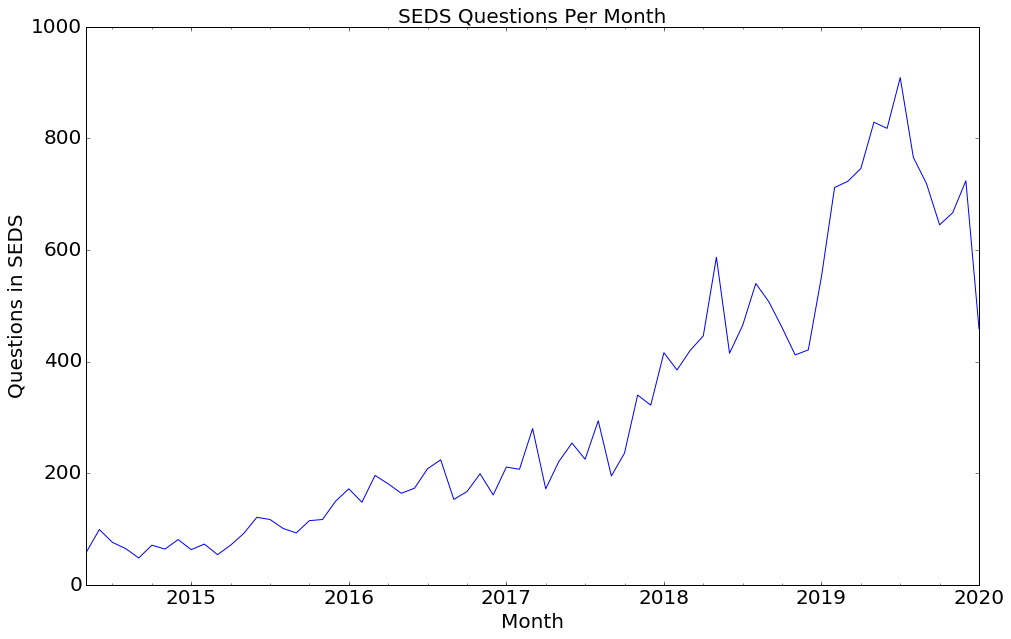

In [65]:
ax = q_by_month.plot(x="Month",y="Number of Questions",kind="line",figsize=(16,10),
                               title="SEDS Questions Per Month",color = "b")
ax.set_title("SEDS Questions Per Month", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Questions in SEDS")
plt.tick_params(labelsize = 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Questions in SEDS', fontsize=20)

In [66]:
def is_tagged_deep(row):
    if len(findall(r"<deep-learning>",row["Tags"])) > 0:
        row["Tagged Deep"] = True
    else:
        row["Tagged Deep"] = False
    return row       

In [67]:
questions_all = questions_all.apply(is_tagged_deep,axis=1)

In [68]:
questions_all

,Id,CreationDate,Tags,Number of Tags,Tagged Deep
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>,5,False
1,45418,2019-02-12 00:50:39,<neural-network>,1,False
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>,3,False
3,45426,2019-02-12 04:51:49,<keras>,1,False
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...,4,False
5,45428,2019-02-12 05:43:18,<cnn>,1,False
6,45430,2019-02-12 06:20:30,<machine-learning><learning>,2,False
7,45431,2019-02-12 07:26:56,<machine-learning>,1,False
8,45433,2019-02-12 08:56:23,<python><keras><tensorflow><lstm>,4,False
9,45434,2019-02-12 09:09:01,<neural-network><feature-selection><mlp>,3,False


In [69]:
q_by_month = questions_all["CreationDate"].groupby(questions_all["CreationDate"].dt.to_period("M")).count()

In [70]:
dl_by_month = questions_all[questions_all["Tagged Deep"]==True]["CreationDate"].groupby(questions_all["CreationDate"].dt.to_period("M")).count()

In [71]:
deep_learning_share = round(dl_by_month/q_by_month,3)

#### Trend of The Deep Learning Share on a Monthly Basis
We see a few months of no questions around 2015, but after that, the trend is clear. As a share of all questions, the deep learning is trending up. It seems the deep learning interest is not a fad but a consistent trend. 

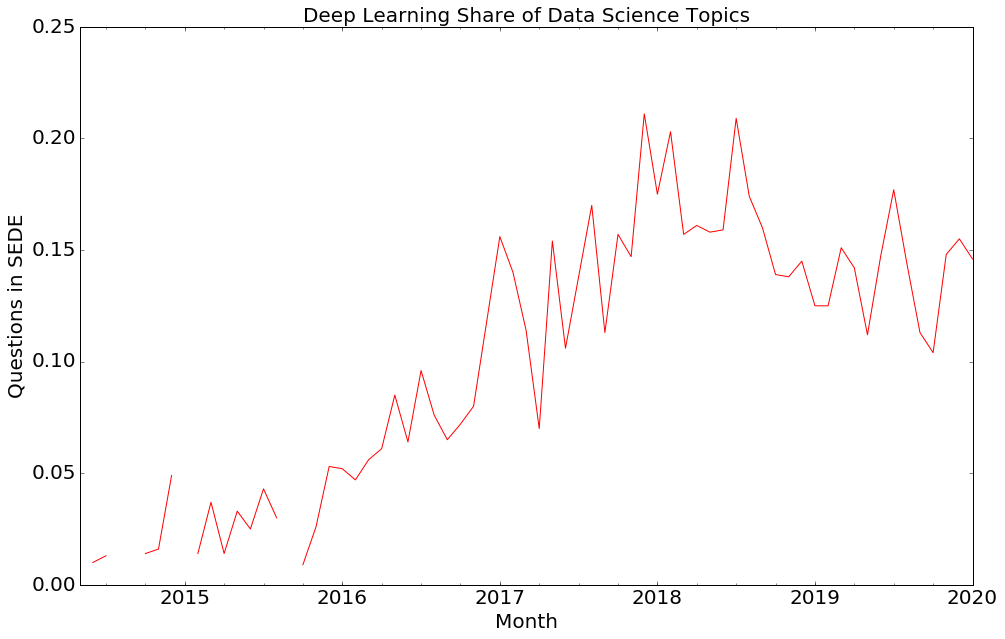

In [72]:
ax = deep_learning_share.plot(x="Month",y="Deep Learning Share",kind="line",figsize=(16,10),
                               title="Deep Learning Share of Data Science Topics",color = "r")
ax.set_title("Deep Learning Share of Data Science Topics", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Questions in SEDE")
plt.tick_params(labelsize = 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Questions in SEDE', fontsize=20)

## Recommendations to improve viewership
Here are three recomendations based on this analysis:
1. Post __deep learning__ topics with the deep learning tag and related tags, such as: 
    - python
    - machine-learning
    - deep-learning
    - neural-network
    - keras
    - tensorflow
    - classification
    - scikit-learn
    - CNN   
<br>
<br>
2. Post topic with __fundamental tags__ that target novice and intermediate users, with tags such as:
    - csv
    - data-formats
    - difference
    - dataframe
    - methods
    - epochs
    - seaborn
    - histogram
    - data-wrangling
<br>
<br>
3. Whenever posting on any topic, use more than one tag. Two are sufficient to receive the __multiple tag bump__.
    